# Quick overview of Astroquery
### Content

**In this notebook you will see:**
>1. How to run simple queries with Astroquery
>2. Search for catalogs or tables on VIZIER
>3. Search the MAST portal 


For complementary material and details Jupyter Notebooks on Astroquery check this link: https://allendowney.github.io/AstronomicalData/README.html

More example of queries in Gaia: https://gea.esac.esa.int/archive-help/adql/examples/index.html

And matching "catalogs" with Skycoord: https://notebook.community/adrn/tutorials/quarantine/coordinates/coordinates

In [344]:

!pip install astroquery

10360.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [345]:
# Import useful Astropy functionality
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np


In [346]:
from astroquery.gaia import Gaia

###  CONE SEARCH 


In [347]:
cone_query = """SELECT
TOP 10
source_id, ra, dec
from gaiadr3.gaia_source
WHERE CONTAINS(
    POINT(ra,dec),
    CIRCLE(88.8,7.4,0.0833)) = 1
"""
### CONTAINS compare the ra = 88.8,dec = 7.4 of the POINT and compares if they are inside
### of the circle of radius = 0.0833 (in deg), returning 1 or 0

In [348]:
cone_job = Gaia.launch_job(cone_query)

In [349]:
cone_job.get_results()

SOURCE_ID,ra,dec
,deg,deg
int64,float64,float64
3322773720244239232,88.8171420662713,7.321302386541319
3322773720244273024,88.81112049715188,7.322593959458728
3322773724536907008,88.8173067708917,7.3191435621856265
3322773724536908800,88.81256690112286,7.317868226159617
3322773724537890048,88.81394318974138,7.330236105914051
3322773724537890944,88.81241654086585,7.3278634621996845
3322773724537891328,88.81570306892304,7.322302359218524
3322773724537891456,88.81309316526819,7.324880886895731


### FORMATING QUERIES

In [350]:
query_base = """SELECT 
TOP 10 
{columns}
from gaiadr3.gaia_source
WHERE CONTAINS(
    POINT(ra,dec),
    CIRCLE(88.8,7.4,0.0833)) = 1
"""

In [351]:
columns = "source_id, ra, dec, pmra, pmdec, parallax"

In [352]:
print(query_base.format(columns=columns))

SELECT 
TOP 10 
source_id, ra, dec, pmra, pmdec, parallax
from gaiadr3.gaia_source
WHERE CONTAINS(
    POINT(ra,dec),
    CIRCLE(88.8,7.4,0.0833)) = 1



Skycoord also has a built-in search for finding the coords of known objects


In [353]:
query_base = """SELECT 
TOP 10 
{columns}
from gaiadr3.gaia_source
WHERE CONTAINS(
    POINT(ra,dec),
    CIRCLE({coords},{radius})) = 1
"""

In [414]:
omegaCen = SkyCoord.from_name('Omega Centauri')
rad =5*u.arcmin


In [356]:
omegaCen.to_string()

'201.691 -47.4769'

In [358]:
print(query_base.format(columns=columns,coords=omegaCen.to_string().replace(" ", ","),radius=rad.to(u.deg).value))

SELECT 
TOP 10 
source_id, ra, dec, pmra, pmdec, parallax
from gaiadr3.gaia_source
WHERE CONTAINS(
    POINT(ra,dec),
    CIRCLE(201.691,-47.4769,0.08333333333333333)) = 1



In [ ]:
t = omegaCen.to_string()
t.replace(" ", ",")

In [ ]:
print(query_base.format(columns=columns,coords=omegaCen.to_string().replace(" ", ","),radius=rad.to(u.deg).value))

In [359]:
new_cone_query = query_base.format(columns=columns,coords=omegaCen.to_string().replace(" ", ","),radius=rad.to(u.deg).value)

In [360]:
cone_job = Gaia.launch_job(new_cone_query)

In [361]:
cone_job.get_results()

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6083714419081881344,201.5931116674029,-47.428636791522486,-3.398580574606042,-6.868273020888472,-0.0032843914712478717
6083714419081881856,201.58510933682987,-47.437916223355,--,--,--
6083714419086126464,201.5810159128903,-47.440116294696864,-2.1181669536354466,-7.140028687284547,-0.8698626729385006
6083714419086139904,201.5941343896766,-47.43165537942561,-2.523535971598739,-6.68228609442076,-0.146121801316748
6083714423385960704,201.58215437600933,-47.44131448582799,--,--,--
6083714423401871360,201.57956549116975,-47.4415500851353,--,--,--
6083714423404348928,201.58462266325859,-47.43969419853329,--,--,--
6083714423401929216,201.5844674251622,-47.436068907830304,-2.5125113732479405,-6.161360912130554,-0.49912655001960465


# Query Object on SDSS

In [367]:
M87 = SkyCoord.from_name("Sombrero")

In [368]:
# Get closeby sources from SDSS
from astroquery.sdss import SDSS
sdss = SDSS()
closeby_sources = sdss.query_region(M87, radius=1 * u.arcmin, timeout=3600)

In [369]:
closeby_sources

ra,dec,objid,run,rerun,camcol,field
float64,float64,uint64,int64,int64,int64,int64
189.996855871974,-11.6151816468422,1237671267102228498,6005,301,6,86
190.004490327361,-11.6156294269607,1237671267102228486,6005,301,6,86
190.002746066753,-11.613211232049,1237671267102228487,6005,301,6,86
190.001375157586,-11.6163315166228,1237671267102228485,6005,301,6,86
190.01148049767,-11.615672080584,1237671267102228490,6005,301,6,86
189.986233542059,-11.6112971571891,1237671267102228492,6005,301,6,86


In [370]:
images = sdss.get_images(matches=closeby_sources, band =['u', 'g', 'r', 'i', 'z'])


In [371]:
images

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x131e18490>, <astropy.io.fits.hdu.image.ImageHDU object at 0x137e4e3d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x137e4e250>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x137f587d0>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x137f4b610>, <astropy.io.fits.hdu.image.ImageHDU object at 0x137dc2ed0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x137db0d10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x138041b90>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x137dec650>, <astropy.io.fits.hdu.image.ImageHDU object at 0x138030550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x138032290>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x13803ce10>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x137f80f10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13803c550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x13803f950>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x137e77090

In [372]:
np.shape(images)

(30, 4)

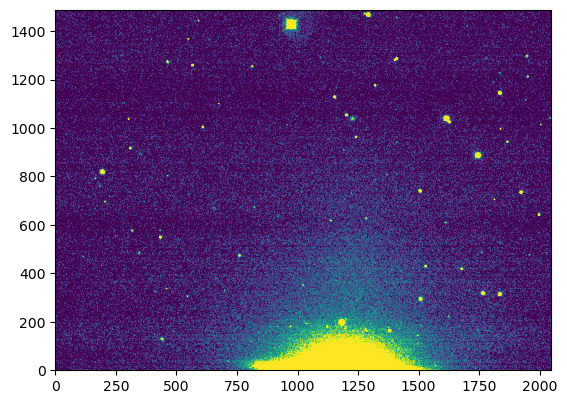

In [373]:
plt.imshow(images[0][0].data, vmin=0, vmax=0.1,origin="lower")


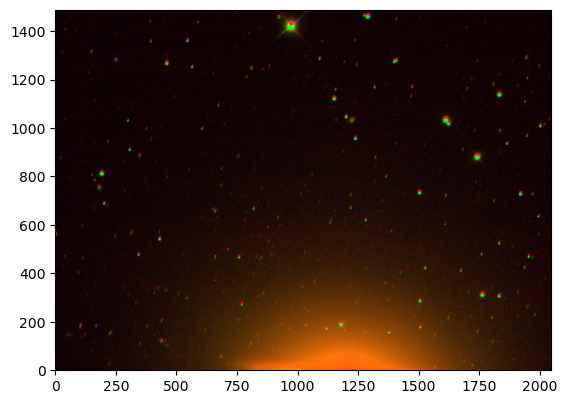

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
rng = np.random.default_rng()
image_r = images[4][0].data
image_g = images[2][0].data
image_b = images[0][0].data
image = make_lupton_rgb(image_r, image_g, image_b, stretch=1.0)
plt.imshow(image,origin="lower")

# Little Example of Astroquery VIZIER 

## First let's retreive tables from your papers from VIZIER

In [375]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs("Dumont")

In [376]:
[print(f'{k}:{v.description}') for k,v in catalog_list.items()]


J/ApJ/914/16:NGC 5128 GCs from PISCes, Gaia DR2 and NSC (Hughes+, 2021)
J/ApJ/929/147:Luminous globular clusters in NGC 5128 (Dumont+, 2022)
J/A+A/376/775:UBVRI and H-beta observations of 3C 390.3 (Shapovalova+ 2001)
J/A+A/422/925:Profile variability in lines of NGC 5548 (Shapovalova+ 2004)
J/AJ/144/39:Galactic RRab stars from the GEOS RR Lyr Survey (Le Borgne+, 2012)


[None, None, None, None, None]

In [377]:
table_dumont = Vizier.get_catalogs("J/ApJ/929/147")

In [379]:
table_dumont[0]

sig,ID,r_ID,RAJ2000,DEJ2000,S_N,g0mag,RVel,e_RVel,Z,e_Z,setup,Mm,Ref,rCat,SimbadName
,,,deg,deg,,mag,km / s,km / s,,,,,,,
str1,str17,str15,float64,float64,float32,float32,float32,float32,float32,float32,str7,str1,str5,int16,str19
,GC_cand_37,This Work,200.926244,-43.565931,8.08,19.56,--,--,--,--,M2FS ca,,,0,
,GC_cand_38,This Work,200.959920,-43.543763,4.68,21.04,--,--,--,--,M2FS ca,,,0,
,T17-1027,Taylor2017,200.969649,-43.318745,4.91,20.01,502.0,7.1,0.20,0.34,M2FS ca,Y,New,0,
,AAT301956,Beasley2008,200.977085,-43.333630,5.54,20.37,--,--,--,--,M2FS ca,,,1,[BBP2008] AAT301956
,H21-200841,This Work,200.979670,-43.463985,7.23,20.51,--,--,--,--,M2FS ca,,,0,
,GC_cand_0,This Work,200.989659,-42.868971,18.46,18.79,0.7,5.9,1.03,0.32,M2FS ca,N,New,0,
,AAT101931,Beasley2008,200.993959,-42.954726,13.16,19.84,337.1,6.1,1.31,0.36,M2FS ca,Y,RV,1,[BBP2008] AAT101931
,AAT102120,Beasley2008,200.998330,-42.922039,14.77,19.88,254.4,5.9,1.49,0.33,M2FS ca,N,RV,0,[BBP2008] AAT102120


# CROSS-MATCHING THE PAPER TABLE WITH GAIA
### FIND GAIA CATALOG IN VIZIER

In [380]:
catalog_list_gaia = Vizier.find_catalogs("gaia")
for catalog_ID, catalog in catalog_list_gaia.items():
    print(catalog_ID, ": ", catalog.description)

I/324 :  The Initial Gaia Source List (IGSL) (Smart, 2013)
I/337 :  Gaia DR1 (Gaia Collaboration, 2016)
I/345 :  Gaia DR2 (Gaia Collaboration, 2018)
I/347 :  Distances to 1.33 billion stars in Gaia DR2 (Bailer-Jones+, 2018)
I/350 :  Gaia EDR3 (Gaia Collaboration, 2020)
I/352 :  Distances to 1.47 billion stars in Gaia EDR3 (Bailer-Jones+, 2021)
I/355 :  Gaia DR3 Part 1. Main source (Gaia Collaboration, 2022)
I/356 :  Gaia DR3 Part 2. Extra-galactic (Gaia Collaboration, 2022)
I/357 :  Gaia DR3 Part 3. Non-single stars (Gaia Collaboration, 2022)
I/358 :  Gaia DR3 Part 4. Variability (Gaia Collaboration, 2022)
I/359 :  Gaia DR3 Part 5. Solar System (Gaia Collaboration, 2022)
I/360 :  Gaia DR3 Part 6. Performance verification (Gaia Collaboration, 2022)
I/361 :  Gaia Focused Product Release (Gaia FPR) (Gaia Collaboration, 2023)
IV/36 :  Gaia-IPHAS/KIS Value-Added Catalogues (Scaringi+, 2018)
VI/137 :  GaiaSimu Universe Model Snapshot (Robin+, 2012)
VI/145 :  ASC Gaia Attitude Star Catalog (S

In [381]:
Vizier.get_catalogs("I/355")

TableList with 15 tables:
	'0:I/355/gaiadr3' with 57 column(s) and 50 row(s) 
	'1:I/355/paramp' with 24 column(s) and 50 row(s) 
	'2:I/355/paramsup' with 24 column(s) and 50 row(s) 
	'3:I/355/tgextmap' with 10 column(s) and 50 row(s) 
	'4:I/355/tgextopt' with 7 column(s) and 50 row(s) 
	'5:I/355/oaninfo' with 14 column(s) and 50 row(s) 
	'6:I/355/oaxpsp' with 7 column(s) and 50 row(s) 
	'7:I/355/epphot' with 48 column(s) and 50 row(s) 
	'8:I/355/gcrf3xm' with 19 column(s) and 50 row(s) 
	'9:I/355/rvsmean' with 9 column(s) and 50 row(s) 
	'10:I/355/xpsummary' with 22 column(s) and 50 row(s) 
	'11:I/355/xpsamp' with 5 column(s) and 50 row(s) 
	'12:I/355/xpmerge' with 4 column(s) and 50 row(s) 
	'13:I/355/xpcont' with 26 column(s) and 50 row(s) 
	'14:I/355/spectra' with 5 column(s) and 50 row(s) 

In [382]:
from astroquery.xmatch import XMatch
xmatch = XMatch()

In [383]:
match_table_to_gaia = XMatch.query(cat1=table_dumont[0],
                     cat2='vizier:I/355/gaiadr3',
                     max_distance=1 * u.arcsec, colRA1='RAJ2000',
                     colDec1='DEJ2000')


In [384]:
match_table_to_gaia

angDist,sig,ID,r_ID,RAJ2000,DEJ2000,S_N,g0mag,RVel,e_RVel,Z,e_Z,setup,Mm,Ref,rCat,SimbadName,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff,B_Teff,logg,b_logg,B_logg,[Fe/H],b_[Fe/H],B_[Fe/H],Dist,b_Dist,B_Dist,A0,b_A0,B_A0,AG,b_AG,B_AG,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ20002,DEJ20002,e_RAJ2000,e_DEJ2000,RADEcorJ2000
arcsec,,,,,,,,,,,,,,,,,,deg,deg,arcsec,arcsec,deg,,,,mas,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,deg,,,,,,electron/s,electron/s,,mag,,,electron/s,electron/s,,mag,,,electron/s,electron/s,,mag,,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,dex(cm / s2),dex,,km / s,km / s,,mag,mag,,,,,,,K,K,K,dex(cm / s2),dex(cm / s2),dex(cm / s2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,deg,deg,,,
float64,str1,str10,str14,float64,float64,float32,float32,float32,float32,float32,float32,str7,str1,str5,int16,str19,str28,float64,float64,float32,float32,float32,int64,int64,int32,float32,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,uint8,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,uint8,float32,int16,float32,float32,uint8,uint8,float32,uint8,int16,float64,float32,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,float64,float32,float32,float32,float32,float32,int16,int16,int16,int16,uint8,float32,float32,float32,float32,float32,uint8,int16,int16,uint8,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,uint8,float32,float32,int16,float32,str13,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str7,float64,float64,float64,float64,float32
0.001077,,GC_cand_37,This Work,200.926244,-43.565931,8.08,19.56,--,--,--,--,M2FS ca,,,0,,Gaia DR3 6088617077009445760,200.92624414923,-43.56593072105,0.004,0.003,87.0,1636148068921376768,6088617077009445760,1083194028,3.7051,2.9364,--,--,--,--,--,--,--,--,0.0255,--,--,--,--,--,--,--,--,--,123,0,121,2,17.4271,633.32,21.146,78.491,3,False,--,--,--,--,--,--,--,--,14,12,7.719365,19,0.1446,107.3,0,0,--,0,119,71.44982,1.22949,58.1133,21.052364,0.018885,18,139.338,8.24828,16.893,19.978365,0.064332,18,372.403,8.33217,44.6946,18.320362,0.024585,7.162,0,1,0,1,0,1.658003,-1.073999,2.732002,--,--,0,0,0,0,--,--,--,--,--,--,--,--,0,--,--,0,--,--,0,--,NOT_AVAILABLE,0.0,0.013356,0.985474,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,,200.92624414923,-43.56593072105,3.705059,2.936364,0.0255
0.001643,,T17-1027,Taylor2017,200.969649,-43.318745,4.91,20.01,502.0,7.1,0.2,0.34,M2FS ca,Y,New,0,,Gaia DR3 6088671674634514560,200.96964867757,-43.31874539148,0.013,0.009,89.0,1636148068921376768,6088671674634514560,1451607608,13.3384,8.5847,--,--,--,--,--,--,--,--,0.0138,--,--,--,--,--,--,--,--,--,76,0,76,0,26.2005,1060.4,52.55,78.971,3,False,--,--,--,--,--,--,--,--,9,7,38.890434,16,0.338,29.99,0,6,--,0,60,38.45997,1.38923,27.6844,21.724844,0.039315,12,100.834,14.6306,6.89197,20.32952

# Search MAST archive


In [385]:
from astroquery.mast import Observations
obs_table = Observations.query_object("M87",radius=".02 deg")
len(obs_table)

6598

In [391]:
obs_table = Observations.query_criteria(dataproduct_type=["image"],
                                        proposal_pi="*Seth*",
                                        project='JWST',
                                        proposal_id = '2016', product_type= "SCIENCE"
                                       )

In [392]:
obs_table


intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str7,str10,str4,str6,str8,str16,str63,str29,float64,float64,str5,str13,int64,float64,float64,float64,float64,float64,str60,float64,str4,str2,int64,str119,str55,str56,str6,bool,float64,str9,str9
science,JWST,CALJWST,MIRI/IMAGE,JWST,F560W,INFRARED,NGC-4395-MIRI-BG,Galaxy; Active galactic nuclei; Dwarf galaxies; Spiral galaxies,jw02016-o003_t003_miri_f560w,186.45570833333332,33.59686111111111,image,"Seth, Anil C.",3,60105.72402612639,60105.72617806713,230.328,5000.0,6200.0,Revealing Low Luminosity Active Galactic Nuclei (ReveaLLAGN),60472.15167815,2016,GO,--,POLYGON 186.422965802 33.609470217 186.454302833 33.592027568 186.433159415 33.565671238 186.401827684 33.583108559,mast:JWST/product/jw02016-o003_t003_miri_f560w_i2d.jpg,mast:JWST/product/jw02016-o003_t003_miri_f560w_i2d.fits,PUBLIC,False,nan,144483760,640515793
science,JWST,CALJWST,MIRI/IMAGE,JWST,F770W,INFRARED,NGC-4395-MIRI-BG,Galaxy; Active galactic nuclei; Dwarf galaxies; Spiral galaxies,jw02016-o003_t003_miri_f770w,186.45570833333332,33.59686111111111,image,"Seth, Anil C.",3,60105.718308360185,60105.72046030092,230.328,6600.0,8800.0,Revealing Low Luminosity Active Galactic Nuclei (ReveaLLAGN),60472.15167815,2016,GO,--,POLYGON 186.422969265 33.609471202 186.454306291 33.592028546 186.433162865 33.56567222 186.401831138 33.583109548,mast:JWST/product/jw02016-o003_t003_miri_f770w_i2d.jpg,mast:JWST/product/jw02016-o003_t003_miri_f770w_i2d.fits,PUBLIC,False,nan,144483770,640515797
science,JWST,CALJWST,MIRI/IMAGE,JWST,F1130W,INFRARED,NGC-4395-MIRI-BG,Galaxy; Active galactic nuclei; Dwarf galaxies; Spiral galaxies,jw02016-o003_t003_miri_f1130w,186.45570833333332,33.59686111111111,image,"Seth, Anil C.",3,60105.71191724907,60105.71406918982,230.328,10950.0,11650.0,Revealing Low Luminosity Active Galactic Nuclei (ReveaLLAGN),60472.15167815,2016,GO,--,POLYGON 186.422955207 33.609484987 186.454292246 33.592042341 186.433148829 33.565686009 186.401817089 33.583123327,mast:JWST/product/jw02016-o003_t003_miri_f1130w_i2d.jpg,mast:JWST/product/jw02016-o003_t003_miri_f1130w_i2d.fits,PUBLIC,False,nan,144483780,640515802
science,JWST,CALJWST,MIRI/IMAGE,JWST,F770W,INFRARED,NGC-1052-MIRI-BG,Galaxy; Active galactic nuclei; Elliptical galaxies,jw02016-o012_t012_miri_f770w,40.27133333333334,-8.210472222222222,image,"Seth, Anil C.",3,59802.05579804769,59802.057949988426,230.328,6600.0,8800.0,Revealing Low Luminosity Active Galactic Nuclei (ReveaLLAGN),60167.7058216,2016,GO,--,POLYGON 40.300497259 -8.202159852 40.269022304 -8.20607751 40.265026834 -8.174618776 40.296499342 -8.170701428,mast:JWST/product/jw02016-o012_t012_miri_f770w_i2d.jpg,mast:JWST/product/jw02016-o012_t012_miri_f770w_i2d.fits,PUBLIC,False,nan,88809693,640535208
science,JWST,CALJWST,MIRI/IMAGE,JWST,F770W,INFRARED,SOMBRERO-MIRI-BG,Galaxy; Active galactic nuclei; Spiral galaxies,jw02016-o024_t024_miri_f770w,189.98325416666665,-11.53651111111111,image,"Seth, Anil C.",3,59764.4131654088,59764.415317349536,230.328,6600.0,8800.0,Revealing Low Luminosity Active Galactic Nuclei (ReveaLLAGN),60139.5416666,2016,GO,--,POLYGON 189.954252695 -11.526666869 189.982544588 -11.541399556 189.967360198 -11.569392503 189.939066279 -11.554658345,mast:JWST/product/jw02016-o024_t024_miri_f770w_i2d.jpg,mast:JWST/product/jw02016-o024_t024_miri_f770w_i2d.fits,PUBLIC,False,nan,87623256,640535219
science,JWST,CALJWST,MIRI/IMAGE,JWST,F770W,INFRARED,M-87-MIRI-BG,Galaxy; Active galactic nuclei; Elliptical galaxies,jw02016-o027_t027_miri_f770w,187.70956666666666,12.318888888888889,image,"Seth, Anil C.",3,60120.44960323287,60120.45175517361,230.328,6600.0,8800.0,Revealing Low Luminosity Active Galactic Nucle

In [393]:
obs_table[3]['obs_id']


'jw02016-o012_t012_miri_f770w'

In [394]:
data_products_by_obs = Observations.get_product_list(obs_table[3])

In [395]:
data_products_by_obs

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str8,str4,str5,str34,str64,str1,str68,str9,str28,str9,str1,str7,str6,str4,str50,int64,str8,str6,int64,str5
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS1 guide star acquisition,S,mast:JWST/product/jw02016012001_gs-acq1_2022223010841_stream.fits,AUXILIARY,--,GS-ACQ1,--,CALJWST,--,2016,jw02016012001_gs-acq1_2022223010841_stream.fits,406080,88809693,PUBLIC,1,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS1 guide star acquisition,S,mast:JWST/product/jw02016012001_gs-acq1_2022223010841_uncal.fits,AUXILIARY,--,GS-ACQ1,--,CALJWST,--,2016,jw02016012001_gs-acq1_2022223010841_uncal.fits,420480,88809693,PUBLIC,1,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS1 guide star acquisition,S,mast:JWST/product/jw02016012001_gs-acq1_2022223010841_cal.fits,AUXILIARY,--,GS-ACQ1,--,CALJWST,1.15.1,2016,jw02016012001_gs-acq1_2022223010841_cal.fits,1284480,88809693,PUBLIC,2,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS2 guide star acquisition,S,mast:JWST/product/jw02016012001_gs-acq2_2022223010843_stream.fits,AUXILIARY,--,GS-ACQ2,--,CALJWST,--,2016,jw02016012001_gs-acq2_2022223010843_stream.fits,34560,88809693,PUBLIC,1,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS2 guide star acquisition,S,mast:JWST/product/jw02016012001_gs-acq2_2022223010843_uncal.fits,AUXILIARY,--,GS-ACQ2,--,CALJWST,--,2016,jw02016012001_gs-acq2_2022223010843_uncal.fits,48960,88809693,PUBLIC,1,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS2 guide star acquisition,S,mast:JWST/product/jw02016012001_gs-acq2_2022223010843_cal.fits,AUXILIARY,--,GS-ACQ2,--,CALJWST,1.15.1,2016,jw02016012001_gs-acq2_2022223010843_cal.fits,106560,88809693,PUBLIC,2,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS guide star fine guide,S,mast:JWST/product/jw02016012001_gs-fg_2022223013257_stream.fits,AUXILIARY,--,GS-FG,--,CALJWST,--,2016,jw02016012001_gs-fg_2022223013257_stream.fits,22556160,88809693,PUBLIC,1,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS guide star fine guide,S,mast:JWST/product/jw02016012001_gs-fg_2022223013257_uncal.fits,AUXILIARY,--,GS-FG,--,CALJWST,--,2016,jw02016012001_gs-fg_2022223013257_uncal.fits,28684800,88809693,PUBLIC,1,F770W
88778570,JWST,image,jw02016012001_02102_00001_mirimage,FGS guide star fine guide,S,mast:JWST/product/jw02016012001_gs-fg_2022223013257_cal.fits,AUXILIARY,--,GS-FG,--,CALJWST,1.15.1,2016,jw02016012001_gs-fg_2022223013257_cal.fits,22354560,88809693,PUBLIC,2,F770W


In [396]:
data_products = data_products_by_obs[(data_products_by_obs['obs_id'] == 'jw02016-o012_t012_miri_f770w') & 
                                    (data_products_by_obs['productType'] == 'PREVIEW')]

In [397]:
data_products


obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str8,str4,str5,str34,str64,str1,str68,str9,str28,str9,str1,str7,str6,str4,str50,int64,str8,str6,int64,str5
88809693,JWST,image,jw02016-o012_t012_miri_f770w,Preview-Full,D,mast:JWST/product/jw02016-o012_t012_miri_f770w_i2d.jpg,PREVIEW,--,--,--,CALJWST,1.15.1,2016,jw02016-o012_t012_miri_f770w_i2d.jpg,150190,88809693,PUBLIC,3,F770W


In [398]:

Observations.download_products(data_products) 


INFO: Found cached file ./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.jpg with expected size 150190. [astroquery.query]


Local Path,Status,Message,URL
str85,str8,object,object
./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.jpg,COMPLETE,None,None


In [399]:
from PIL import Image

In [400]:
im = Image.open('./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.jpg')

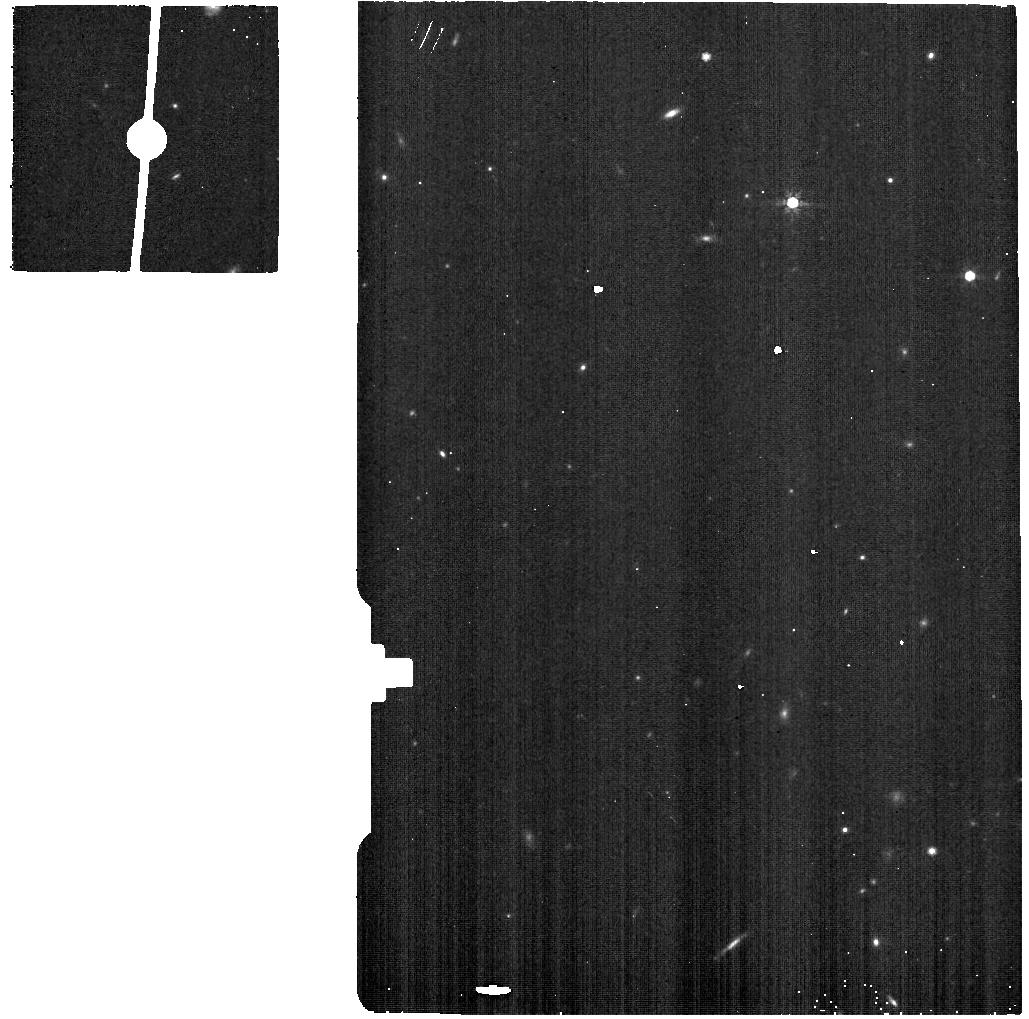

In [401]:
im

In [402]:
data_products = data_products_by_obs[(data_products_by_obs['obs_id'] == 'jw02016-o012_t012_miri_f770w') & 
                                    (data_products_by_obs['productType'] == 'SCIENCE')]

In [403]:
data_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str8,str4,str5,str34,str64,str1,str68,str9,str28,str9,str1,str7,str6,str4,str50,int64,str8,str6,int64,str5
88809693,JWST,image,jw02016-o012_t012_miri_f770w,target (L3) : source catalog,D,mast:JWST/product/jw02016-o012_t012_miri_f770w_cat.ecsv,SCIENCE,Minimum Recommended Products,CAT,--,CALJWST,1.15.1,2016,jw02016-o012_t012_miri_f770w_cat.ecsv,117201,88809693,PUBLIC,3,F770W
88809693,JWST,image,jw02016-o012_t012_miri_f770w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw02016-o012_t012_miri_f770w_i2d.fits,SCIENCE,Minimum Recommended Products,I2D,--,CALJWST,1.15.1,2016,jw02016-o012_t012_miri_f770w_i2d.fits,29543040,88809693,PUBLIC,3,F770W


In [405]:
Observations.download_products(data_products) 

INFO: Found cached file ./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_cat.ecsv with expected size 117201. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.fits with expected size 29543040. [astroquery.query]


Local Path,Status,Message,URL
str86,str8,object,object
./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_cat.ecsv,COMPLETE,None,None
./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.fits,COMPLETE,None,None


In [406]:
from astropy.io import fits


In [407]:
jwst_image = fits.open('./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.fits')


In [408]:
jwst_image.info()

Filename: ./mastDownload/JWST/jw02016-o012_t012_miri_f770w/jw02016-o012_t012_miri_f770w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     346   ()      
  1  SCI           1 ImageHDU        75   (1029, 1019)   float32   
  2  ERR           1 ImageHDU        10   (1029, 1019)   float32   
  3  CON           1 ImageHDU        10   (1029, 1019, 1)   int32   
  4  WHT           1 ImageHDU         9   (1029, 1019)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (1029, 1019)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (1029, 1019)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (1029, 1019)   float32   
  8  HDRTAB        1 BinTableHDU    842   1R x 416C   [23A, 5A, 3A, 48A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 60A, 13A, 2A, D, 32A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 35A, D, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 16A, 8A, 5A, D, D, D, D, D, D, D, D, D, D, 4A, 

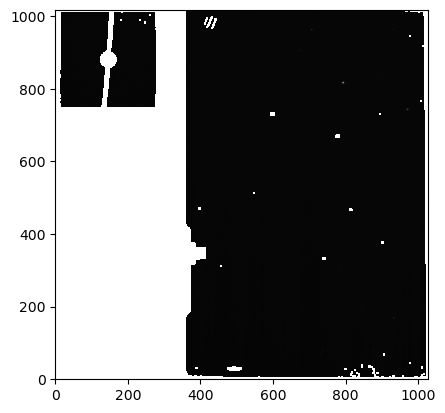

In [409]:
plt.imshow(jwst_image['SCI'].data, cmap='Greys_r',origin="lower")

In [410]:
from astroquery.vo_conesearch import conesearch

In [418]:
conesearch.list_catalogs()

['2MASS All-Sky Catalog of Point Sources 1',
 'Gaia DR2 5',
 'Guide Star Catalog 2.3 Cone Search 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 2',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 3',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 4',
 'The HST Guide Star Catalog, Version 1.1 1',
 'The HST Guide Star Catalog, Version 1.2 1',
 'The HST Guide Star Catalog, Version GSC-ACT 1',
 'The PMM USNO-A1.0 Catalogue 1',
 'The USNO-A2.0 Catalogue 1',
 'The USNO-B1.0 Catalog 2',
 'Two Micron All Sky Survey (2MASS) 1',
 'Two Micron All Sky Survey (2MASS) 2']

In [419]:
from astroquery.eso import Eso

In [ ]:
Eso.query_surveys()